# K Nearest Neighbors
University of Denver

Makarand Nadendla

In [121]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [6]:
delivery_train = pd.read_csv("delivery_time_train_data.csv")
delivery_test = pd.read_csv("delivery_time_test_data.csv")
student_train = pd.read_csv("student_train_data.csv")
student_test = pd.read_csv("student_test_data.csv")

In [7]:
delivery_train.head()

,Miles,Deliveries,Time
0,100,4,9.3
1,50,3,4.8
2,100,4,8.9
3,100,2,6.5
4,50,2,4.2


In [8]:
delivery_test.head()

,Miles,Deliveries,Time
0,50,3,4.6
1,65,2,5.5
2,80,1,6.3
3,70,1,6.2
4,70,5,8.5


In [9]:
student_train.head()

,GPA,Age,Dropped
0,3.78,21,0
1,2.38,27,0
2,3.05,21,1
3,2.19,28,1
4,3.22,23,0


In [10]:
student_test.head()

,GPA,Age,Dropped
0,2.49,26,1
1,2.67,29,0
2,2.86,29,1
3,2.21,26,0
4,2.91,20,1


In [11]:
X_delivery_train = delivery_train[["Miles", "Deliveries"]]
y_delivery_train = delivery_train["Time"]

X_delivery_test = delivery_test[["Miles", "Deliveries"]]
y_delivery_test = delivery_test["Time"]

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train["Dropped"]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test["Dropped"]


In [12]:
j = 0
for i in [X_delivery_train, y_delivery_train, X_delivery_test, y_delivery_test, X_student_train, y_student_train, X_student_test, y_student_test]:
    print(i.shape)
    j += 1
    if j % 2 == 0:
        print("")

(199, 2)
(199,)

(101, 2)
(101,)

(400, 2)
(400,)

(100, 2)
(100,)



In [13]:
def distance_calc(train_inst, test_inst):
    distance = [(i-j)**2 for i,j in zip(test_inst, train_inst)]
    return sum(distance)

def knn_predict(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):

        # grab a test instance from the X_test data
        test_instance = X_test.iloc[i]
        dist = X_train.apply(distance_calc, test_inst = test_instance, axis = 1)

        # calculate the distance between the test_instance and the rest of the possible entries
        dist_df = pd.DataFrame({"Distance": dist, "Y_train": y_train})
        dist_df.sort_values(by="Distance", axis = 0, inplace= True)

        pred_val = np.mean(dist_df["Y_train"][:k])
        y_pred.append(pred_val)
    return y_pred

In [14]:
y_delivery_train_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_train)
y_delivery_test_pred = knn_predict(X_delivery_train, y_delivery_train, X_delivery_test)

In [15]:
def mse_pred(y, y_pred):
    distance = [(i-j)**2 for i,j in zip(y, y_pred)]
    return sum(distance)/len(distance)
mse_pred(y_delivery_test, y_delivery_test_pred)

1.0977544554455447

In [16]:
mse_pred(y_delivery_train, y_delivery_train_pred)

0.5889105527638189

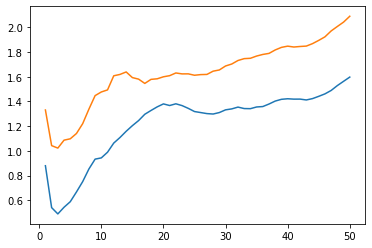

In [17]:
k_vals = [k for k in range(1,51)]
delivery_train_mse = []
delivery_test_mse = []

for k_select in k_vals: 
    delivery_train_mse.append(mse_pred(knn_predict(X_delivery_train, y_delivery_train, X_delivery_train, k = k_select),y_delivery_train))
    delivery_test_mse.append(mse_pred(knn_predict(X_delivery_train, y_delivery_train, X_delivery_test, k = k_select),y_delivery_test))

    
    #print("")
    #print(f"k: {k_select}\nTrain Set Accuracy: {}\nTest Set Accuracy: {mse_pred(y_delivery_test, y_delivery_test_pred)}")

plt.plot(k_vals, delivery_train_mse, label="train_mse")
plt.plot(k_vals, delivery_test_mse, label="test_mse")
plt.show()

In [26]:
model = KNeighborsRegressor()
model.fit(X_delivery_train, y_delivery_train)
y_pred = model.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_pred)

1.1209346534653466

In [35]:
pipe = Pipeline([('scaler', StandardScaler()), ('KNeighbors', KNeighborsRegressor())])
pipe.fit(X_delivery_train, y_delivery_train)
y_pred = pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_pred)

1.0048316831683173

In [37]:
pipe = Pipeline([('scaler', StandardScaler()), ('RandomForest', RandomForestRegressor())])
pipe.fit(X_delivery_train, y_delivery_train)
y_pred = pipe.predict(X_delivery_test)
mean_squared_error(y_delivery_test, y_pred)

0.9543512380671697

In [39]:
scaler = StandardScaler()

student_train[["GPA", "Age"]] = scaler.fit_transform(student_train[["GPA", "Age"]]) 
student_test[["GPA", "Age"]] = scaler.fit_transform(student_test[["GPA", "Age"]])

X_student_train = student_train[["GPA", "Age"]]
y_student_train = student_train["Dropped"]

X_student_test = student_test[["GPA", "Age"]]
y_student_test = student_test["Dropped"]

In [72]:
def distance_calc(train_inst, test_inst):
    distance = [(i-j)**2 for i,j in zip(test_inst, train_inst)]
    return sum(distance)

def knn_classify(X_train, y_train, X_test, k=5):
    y_pred = []
    for i in range(0, len(X_test)):

        # grab a test instance from the X_test data
        test_instance = X_test.iloc[i]
        dist = X_train.apply(distance_calc, test_inst = test_instance, axis = 1)

        # calculate the distance between the test_instance and the rest of the possible entries
        dist_df = pd.DataFrame({"Distance": dist, "Y_train": y_train})
        dist_df.sort_values(by="Distance", axis = 0, inplace= True)

        pred_val = dist_df["Y_train"][:k].value_counts().index[0]
        y_pred.append(pred_val)
    return y_pred

In [73]:
y_student_test_pred = knn_classify(X_student_train, y_student_train, X_student_test)

In [74]:
def overall_accuracy(y, y_pred):
    return(np.mean(y==y_pred))
overall_accuracy(y_student_test, y_student_test_pred)

0.72

In [77]:
kClassifier = KNeighborsClassifier()
search = GridSearchCV(kClassifier, param_grid={"n_neighbors":[k for k in range(1,51)]})
search.fit(X_student_train, y_student_train)

kClassifier = KNeighborsClassifier(n_neighbors=search.best_params_["n_neighbors"])
kClassifier.fit(X_student_train, y_student_train)
y_student_test_pred = kClassifier.predict(X_student_test)
overall_accuracy(y_student_test, y_student_test_pred)

0.72

In [119]:
forest = RandomForestClassifier()
forest.fit(X_student_train, y_student_train)
y_student_test_pred = forest.predict(X_student_test)
overall_accuracy(y_student_test, y_student_test_pred)

0.65

In [82]:
students_performance = pd.read_csv("StudentsPerformance.csv")

In [89]:
students_performance.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [95]:
# preprocessing with the scaler
X_train_perf, X_test_perf, y_train_perf, y_test_perf = train_test_split(students_performance[["math score", "reading score", "writing score"]], students_performance["gender"])
scaler = StandardScaler()

X_train_perf[["math score", "reading score", "writing score"]] = scaler.fit_transform(X_train_perf[["math score", "reading score", "writing score"]]) 
X_test_perf[["math score", "reading score", "writing score"]] = scaler.fit_transform(X_test_perf[["math score", "reading score", "writing score"]]) 

kClassifier = KNeighborsClassifier()
search = GridSearchCV(kClassifier, param_grid={"n_neighbors":[k for k in range(1,30)]})
search.fit(X_train_perf, y_train_perf)

kClassifier = KNeighborsClassifier(n_neighbors=search.best_params_["n_neighbors"])
kClassifier.fit(X_train_perf, y_train_perf)
y_pred = kClassifier.predict(X_test_perf)
overall_accuracy(y_test_perf, y_pred)

0.876

In [120]:
y_pred = kClassifier.predict(X_train_perf)
overall_accuracy(y_train_perf, y_pred)

0.8693333333333333